In [1]:
# Imports
import yfinance as yf
import pandas as pd
from datetime import datetime, timedelta
import hvplot.pandas
import numpy as np


## Part 1: 
## Fetch the data from yfinance

In [2]:
# Import the dataset from yfinance
stock_symbol_BTC = "BTC-USD"  # Change this to the desired stock symbol
stock_symbol_ETH = "ETH-USD"  # Change this to the desired stock symbol
stock_symbol_BNB = "BNB-USD"  # Change this to the desired stock symbol
stock_symbol_XRP = "XRP-USD"  # Change this to the desired stock symbol
index_symbol_us10 = "^TNX"
# Calculate the start and end dates for the past 3 years
end_date = datetime.today().date()
start_date = end_date - timedelta(days=3*365)  # 3 years * 365 days

# Fetch historical price data
stock_data_BTC = yf.download(stock_symbol_BTC, start=start_date, end=end_date)
stock_data_ETH = yf.download(stock_symbol_ETH, start=start_date, end=end_date)
stock_data_BNB = yf.download(stock_symbol_BNB, start=start_date, end=end_date)
stock_data_XRP = yf.download(stock_symbol_XRP, start=start_date, end=end_date)
index_data_us10 = yf.download(index_symbol_us10, start=start_date, end=end_date)
# Print the retrieved data
print(stock_data_BTC)
print(stock_data_ETH)
print(stock_data_BNB)
print(stock_data_XRP) 
print(index_data_us10)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
                    Open          High           Low         Close  \
Date                                                                 
2020-10-19  11495.038086  11799.092773  11408.290039  11742.037109   
2020-10-20  11745.974609  11999.917969  11681.480469  11916.334961   
2020-10-21  11913.077148  13184.566406  11900.928711  12823.689453   
2020-10-22  12801.635742  13161.593750  12717.093750  12965.891602   
2020-10-23  12971.548828  13015.961914  12752.647461  12931.539062   
...                  ...           ...           ...           ...   
2023-10-14  26866.203125  26969.000000  26814.585938  26861.707031   
2023-10-15  26858.011719 

In [3]:
Combined_df = pd.concat([stock_data_BTC.Close,stock_data_ETH.Close,stock_data_BNB.Close,stock_data_XRP.Close],axis=1)
Combined_df.columns=['BTC','ETH','BNB','XRP']
Combined_df

,BTC,ETH,BNB,XRP
Date,,,,
2020-10-19,11742.037109,379.935608,29.925068,0.245964
2020-10-20,11916.334961,369.136902,28.803444,0.243573
2020-10-21,12823.689453,392.189972,29.772354,0.251615
2020-10-22,12965.891602,413.772980,30.658192,0.256807
2020-10-23,12931.539062,409.766693,30.633961,0.254879
...,...,...,...,...
2023-10-14,26861.707031,1555.256836,206.601898,0.486775
2023-10-15,27159.652344,1558.069824,209.742508,0.487846
2023-10-16,28519.466797,1600.534302,214.823959,0.497977


## Part 2: 

### Normalized data.

In [4]:
df_normalized = Combined_df / Combined_df.iloc[0]
df_normalized 

,BTC,ETH,BNB,XRP
Date,,,,
2020-10-19,1.000000,1.000000,1.000000,1.000000
2020-10-20,1.014844,0.971578,0.962519,0.990279
2020-10-21,1.092118,1.032254,0.994897,1.022975
2020-10-22,1.104228,1.089061,1.024499,1.044084
2020-10-23,1.101303,1.078516,1.023689,1.036245
...,...,...,...,...
2023-10-14,2.287653,4.093475,6.903974,1.979050
2023-10-15,2.313027,4.100879,7.008923,1.983404
2023-10-16,2.428835,4.212646,7.178729,2.024593


In [5]:
df_normalized[['BTC_return','ETH_return','BNB_return','XRP_return']] = Combined_df.pct_change()
df_normalized.dropna().head()

,BTC,ETH,BNB,XRP,BTC_return,ETH_return,BNB_return,XRP_return
Date,,,,,,,,
2020-10-20,1.014844,0.971578,0.962519,0.990279,0.014844,-0.028422,-0.037481,-0.009721
2020-10-21,1.092118,1.032254,0.994897,1.022975,0.076144,0.062451,0.033639,0.033017
2020-10-22,1.104228,1.089061,1.024499,1.044084,0.011089,0.055032,0.029754,0.020635
2020-10-23,1.101303,1.078516,1.023689,1.036245,-0.002649,-0.009682,-0.000790,-0.007508
2020-10-24,1.116336,1.085599,1.022181,1.042555,0.013651,0.006567,-0.001474,0.006089


In [6]:
df_btc = df_normalized[["BTC","BTC_return"]]
df_btc = pd.DataFrame(df_btc)
df_btc.tail()
df_eth = df_normalized[["ETH","ETH_return"]]
df_eth = pd.DataFrame(df_eth)
df_eth.tail()
df_bnb = df_normalized[["BNB","BNB_return"]]
df_bnb = pd.DataFrame(df_bnb)
df_bnb.tail()
df_xrp = df_normalized[["XRP","XRP_return"]]
df_xrp = pd.DataFrame(df_xrp)
df_xrp.tail()

,XRP,XRP_return
Date,,
2023-10-14,1.979050,0.002215
2023-10-15,1.983404,0.002200
2023-10-16,2.024593,0.020767
2023-10-17,1.999049,-0.012617
2023-10-18,1.985327,-0.006864


## Part 3: 

### Recreate the SMA trading algorithm using rolling technical indicators from the pandas library.

In [7]:
# Define a window size of 100
short_window = 50

# Create a simple moving average (SMA) using the short_window and assign this to a new columns called sma_fast
df_btc["sma_fast_btc"] = df_normalized["BTC"].rolling(window=short_window).mean().dropna()
df_eth["sma_fast_eth"] = df_normalized["ETH"].rolling(window=short_window).mean().dropna()
df_bnb["sma_fast_bnb"] = df_normalized["BNB"].rolling(window=short_window).mean().dropna()
df_xrp["sma_fast_xrp"] = df_normalized["XRP"].rolling(window=short_window).mean().dropna()

# Define a window size of 200
long_window = 100

# Create a simple moving average (SMA) using the short_window and assign this to a new columns called sma_fast
df_btc["sma_slow_btc"] = df_normalized["BTC"].rolling(window=short_window).mean().dropna()
df_eth["sma_slow_eth"] = df_normalized["ETH"].rolling(window=short_window).mean().dropna()
df_bnb["sma_slow_bnb"] = df_normalized["BNB"].rolling(window=short_window).mean().dropna()
df_xrp["sma_slow_xrp"] = df_normalized["XRP"].rolling(window=short_window).mean().dropna()

df_btc.tail()
df_eth.tail()
df_bnb.tail()
df_xrp.tail()

,XRP,XRP_return,sma_fast_xrp,sma_slow_xrp
Date,,,,
2023-10-14,1.979050,0.002215,2.062694,2.062694
2023-10-15,1.983404,0.002200,2.059797,2.059797
2023-10-16,2.024593,0.020767,2.057694,2.057694
2023-10-17,1.999049,-0.012617,2.055128,2.055128
2023-10-18,1.985327,-0.006864,2.050920,2.050920


In [8]:
# Create a new column in the trading_df called signal setting its value to zero.
df_btc["signal"] = 0.0
df_eth["signal"] = 0.0
df_bnb["signal"] = 0.0
df_xrp["signal"] = 0.0
# Create the signal to buy
df_btc.loc[(df_btc["BTC_return"] >= 0), "signal"] = 1
df_eth.loc[(df_eth["ETH_return"] >= 0), "signal"] = 1
df_bnb.loc[(df_bnb["BNB_return"] >= 0), "signal"] = 1
df_xrp.loc[(df_xrp["XRP_return"] >= 0), "signal"] = 1
# Create the signal to sell
df_btc.loc[(df_btc["BTC_return"] < 0), "signal"] = -1
df_eth.loc[(df_eth["ETH_return"] < 0), "signal"] = -1
df_bnb.loc[(df_bnb["BNB_return"] < 0), "signal"] = -1
df_xrp.loc[(df_xrp["XRP_return"] < 0), "signal"] = -1
# Review the DataFrame
display(df_btc.head())
display(df_btc.tail())

,BTC,BTC_return,sma_fast_btc,sma_slow_btc,signal
Date,,,,,
2020-10-19,1.000000,NaN,NaN,NaN,0.0
2020-10-20,1.014844,0.014844,NaN,NaN,1.0
2020-10-21,1.092118,0.076144,NaN,NaN,1.0
2020-10-22,1.104228,0.011089,NaN,NaN,1.0
2020-10-23,1.101303,-0.002649,NaN,NaN,-1.0


,BTC,BTC_return,sma_fast_btc,sma_slow_btc,signal
Date,,,,,
2023-10-14,2.287653,-0.000025,2.269936,2.269936,-1.0
2023-10-15,2.313027,0.011092,2.271897,2.271897,1.0
2023-10-16,2.428835,0.050067,2.276036,2.276036,1.0
2023-10-17,2.420002,-0.003637,2.279970,2.279970,-1.0
2023-10-18,2.412558,-0.003076,2.280993,2.280993,-1.0


In [9]:
# Calculate the strategy returns and add them to the signals_df DataFrame
df_btc['Strategy Returns'] = df_btc['BTC_return'] * df_btc['signal'].shift()
df_eth['Strategy Returns'] = df_eth['ETH_return'] * df_eth['signal'].shift()
df_bnb['Strategy Returns'] = df_bnb['BNB_return'] * df_bnb['signal'].shift()
df_xrp['Strategy Returns'] = df_xrp['XRP_return'] * df_xrp['signal'].shift()
df_btc = df_btc.dropna()
df_eth = df_eth.dropna()
df_bnb = df_bnb.dropna()
df_xrp = df_xrp.dropna()

# Review the DataFrame
display(df_btc.head())
display(df_btc.tail())

,BTC,BTC_return,sma_fast_btc,sma_slow_btc,signal,Strategy Returns
Date,,,,,,
2020-12-07,1.634438,-0.007934,1.366880,1.366880,-1.0,-0.007934
2020-12-08,1.560304,-0.045358,1.378086,1.378086,-1.0,0.045358
2020-12-09,1.580128,0.012705,1.389392,1.389392,1.0,-0.012705
2020-12-10,1.555522,-0.015572,1.398660,1.398660,-1.0,-0.015572
2020-12-11,1.537970,-0.011283,1.407335,1.407335,-1.0,0.011283


,BTC,BTC_return,sma_fast_btc,sma_slow_btc,signal,Strategy Returns
Date,,,,,,
2023-10-14,2.287653,-0.000025,2.269936,2.269936,-1.0,-0.000025
2023-10-15,2.313027,0.011092,2.271897,2.271897,1.0,-0.011092
2023-10-16,2.428835,0.050067,2.276036,2.276036,1.0,0.050067
2023-10-17,2.420002,-0.003637,2.279970,2.279970,-1.0,-0.003637
2023-10-18,2.412558,-0.003076,2.280993,2.280993,-1.0,0.003076


<Axes: xlabel='Date'>

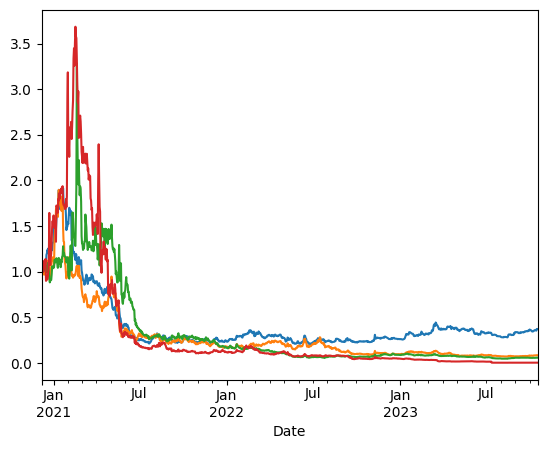

In [10]:
# Plot Strategy Returns to examine performance
(1 + df_btc['Strategy Returns']).cumprod().plot()
(1 + df_eth['Strategy Returns']).cumprod().plot()
(1 + df_bnb['Strategy Returns']).cumprod().plot()
(1 + df_xrp['Strategy Returns']).cumprod().plot()

## Part 4
### Create the feature and target sets

In [11]:
X_btc = df_btc[["sma_fast_btc", "sma_slow_btc"]].shift().dropna()
X_eth = df_eth[["sma_fast_eth", "sma_slow_eth"]].shift().dropna()
X_bnb = df_bnb[["sma_fast_bnb", "sma_slow_bnb"]].shift().dropna()
X_xrp = df_xrp[["sma_fast_xrp", "sma_slow_xrp"]].shift().dropna()

X_btc

,sma_fast_btc,sma_slow_btc
Date,,
2020-12-08,1.366880,1.366880
2020-12-09,1.378086,1.378086
2020-12-10,1.389392,1.389392
2020-12-11,1.398660,1.398660
2020-12-12,1.407335,1.407335
...,...,...
2023-10-14,2.268550,2.268550
2023-10-15,2.269936,2.269936
2023-10-16,2.271897,2.271897


In [12]:
# Copy the new signal column to a new Series called y.
y_btc = df_btc["signal"].copy()
y_eth = df_eth["signal"].copy()
y_bnb = df_bnb["signal"].copy()
y_xrp = df_xrp["signal"].copy()
y_btc

Date
2020-12-07   -1.0
2020-12-08   -1.0
2020-12-09    1.0
2020-12-10   -1.0
2020-12-11   -1.0
             ... 
2023-10-14   -1.0
2023-10-15    1.0
2023-10-16    1.0
2023-10-17   -1.0
2023-10-18   -1.0
Name: signal, Length: 1046, dtype: float64

In [13]:
# Imports 
from pandas.tseries.offsets import DateOffset

In [14]:
# Select the start of the training period
training_begin_btc = X_btc.index.min()
training_begin_eth = X_eth.index.min()
training_begin_bnb = X_bnb.index.min()
training_begin_xrp = X_xrp.index.min()
# Display the training begin date
print(training_begin_btc)
print(training_begin_eth)
print(training_begin_bnb)
print(training_begin_xrp)

2020-12-08 00:00:00
2020-12-08 00:00:00
2020-12-08 00:00:00
2020-12-08 00:00:00


In [15]:
# Select the ending period for the training data with an offset of 3 months
months = 12

training_end_btc = X_btc.index.min() + DateOffset(months=months)
training_end_eth = X_eth.index.min() + DateOffset(months=months)
training_end_bnb = X_bnb.index.min() + DateOffset(months=months)
training_end_xrp = X_xrp.index.min() + DateOffset(months=months)

# Display the training end date
print(training_end_btc)
print(training_end_eth)
print(training_end_bnb)
print(training_end_xrp)

2021-12-08 00:00:00
2021-12-08 00:00:00
2021-12-08 00:00:00
2021-12-08 00:00:00


In [16]:
# Generate the X_train and y_train DataFrames
X_train_btc = X_btc.loc[training_begin_btc:training_end_btc]
y_train_btc = y_btc.loc[training_begin_btc:training_end_btc]

X_train_eth = X_eth.loc[training_begin_eth:training_end_eth]
y_train_eth = y_eth.loc[training_begin_eth:training_end_eth]

X_train_bnb = X_bnb.loc[training_begin_bnb:training_end_bnb]
y_train_bnb = y_bnb.loc[training_begin_bnb:training_end_bnb]

X_train_xrp = X_xrp.loc[training_begin_xrp:training_end_xrp]
y_train_xrp = y_xrp.loc[training_begin_xrp:training_end_xrp]

# Display sample data
y_train_xrp

Date
2020-12-08   -1.0
2020-12-09    1.0
2020-12-10   -1.0
2020-12-11   -1.0
2020-12-12   -1.0
             ... 
2021-12-04   -1.0
2021-12-05   -1.0
2021-12-06    1.0
2021-12-07   -1.0
2021-12-08    1.0
Name: signal, Length: 366, dtype: float64

In [17]:
# Generate the X_test and y_test DataFrames
X_test_btc = X_btc.loc[training_end_btc+ DateOffset(months=1):]
y_test_btc = y_btc.loc[training_end_btc+ DateOffset(months=1):]

X_test_eth = X_eth.loc[training_end_eth+ DateOffset(months=1):]
y_test_eth = y_eth.loc[training_end_eth+ DateOffset(months=1):]

X_test_bnb = X_bnb.loc[training_end_bnb+ DateOffset(months=1):]
y_test_bnb = y_bnb.loc[training_end_bnb+ DateOffset(months=1):]

X_test_xrp = X_xrp.loc[training_end_xrp+ DateOffset(months=1):]
y_test_xrp = y_xrp.loc[training_end_xrp+ DateOffset(months=1):]
#+ DateOffset(months=1)
# Display sample data
X_test_btc.head()
X_test_eth.head()
X_test_bnb.head()
X_test_xrp.head()

,sma_fast_xrp,sma_slow_xrp
Date,,
2022-01-08,3.644503,3.644503
2022-01-09,3.616548,3.616548
2022-01-10,3.588646,3.588646
2022-01-11,3.562558,3.562558
2022-01-12,3.540923,3.540923


In [18]:
# Imports
#from sklearn.preprocessing import StandardScaler
# Create a StandardScaler instance
#scaler = StandardScaler()
#scaler1 = StandardScaler()
#scaler2 = StandardScaler()
#scaler3 = StandardScaler()
 
# Apply the scaler model to fit the X-train data
#X_scaler_btc = scaler.fit(X_train_btc)
#X_scaler_eth = scaler1.fit(X_train_eth)
#X_scaler_bnb = scaler2.fit(X_train_bnb)
#X_scaler_xrp = scaler3.fit(X_train_xrp)

# Transform the X_train and X_test DataFrames using the X_scaler
#X_train_scaled_btc = X_scaler_btc.transform(X_train_btc)
#X_test_scaled_btc = X_scaler_btc.transform(X_test_btc)

#X_train_scaled_eth = X_scaler_eth.transform(X_train_eth)
#X_test_scaled_eth = X_scaler_eth.transform(X_test_eth)

#X_train_scaled_bnb = X_scaler_bnb.transform(X_train_bnb)
#X_test_scaled_bnb = X_scaler_bnb.transform(X_test_bnb)

#X_train_scaled_xrp = X_scaler_xrp.transform(X_train_xrp)
#X_test_scaled_xrp = X_scaler_xrp.transform(X_test_xrp)

## Part 5 
### Fit the model and predict values

In [19]:
# Import LogisticRegression from sklearn
from sklearn.linear_model import LogisticRegression

In [20]:
# Create an instance of the LogisticRegression model
logistic_regression_model_btc = LogisticRegression()
logistic_regression_model_eth = LogisticRegression()
logistic_regression_model_bnb = LogisticRegression()
logistic_regression_model_xrp = LogisticRegression()


In [21]:
# Fit the LogisticRegression model
logistic_regression_model_btc.fit(X_train_btc, y_train_btc)
logistic_regression_model_eth.fit(X_train_eth, y_train_eth)
logistic_regression_model_bnb.fit(X_train_bnb, y_train_bnb)
logistic_regression_model_xrp.fit(X_train_xrp, y_train_xrp)

LogisticRegression()

In [22]:
# Use the trained LogisticRegression model to predict the trading signals for the training data
lr_training_signal_predictions_btc = logistic_regression_model_btc.predict(X_train_btc)
lr_training_signal_predictions_eth = logistic_regression_model_eth.predict(X_train_eth)
lr_training_signal_predictions_bnb = logistic_regression_model_bnb.predict(X_train_bnb)
lr_training_signal_predictions_xrp = logistic_regression_model_xrp.predict(X_train_xrp)

# Display the predictions
lr_training_signal_predictions_btc


array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1.,  1.,  1.,  1

## Part 6 
### Generate Classification report in order to evaluate the model performance 

In [23]:
from sklearn.metrics import classification_report

In [24]:
# Generate a classification report using the training data and the logistic regression model's predications
lr_training_report_btc = classification_report(y_train_btc, lr_training_signal_predictions_btc)
lr_training_report_eth = classification_report(y_train_eth, lr_training_signal_predictions_eth)
lr_training_report_bnb = classification_report(y_train_bnb, lr_training_signal_predictions_bnb)
lr_training_report_xrp = classification_report(y_train_xrp, lr_training_signal_predictions_xrp)

# Review the classification report
print(lr_training_report_btc)
print(lr_training_report_eth)
print(lr_training_report_bnb)
print(lr_training_report_xrp)

              precision    recall  f1-score   support

        -1.0       0.53      0.38      0.44       172
         1.0       0.56      0.70      0.62       194

    accuracy                           0.55       366
   macro avg       0.54      0.54      0.53       366
weighted avg       0.55      0.55      0.54       366

              precision    recall  f1-score   support

        -1.0       0.55      0.10      0.17       161
         1.0       0.57      0.94      0.71       205

    accuracy                           0.57       366
   macro avg       0.56      0.52      0.44       366
weighted avg       0.56      0.57      0.47       366

              precision    recall  f1-score   support

        -1.0       0.61      0.10      0.18       162
         1.0       0.57      0.95      0.71       204

    accuracy                           0.57       366
   macro avg       0.59      0.53      0.45       366
weighted avg       0.59      0.57      0.48       366

              preci

## Part 5
---

### Backtesting a Machine Learning Trading Algorithm

In [25]:
# Use the trained model to predict the trading signals for the testing data.
lr_testing_signal_predictions_btc = logistic_regression_model_btc.predict(X_test_btc)
lr_testing_signal_predictions_eth = logistic_regression_model_eth.predict(X_test_eth)
lr_testing_signal_predictions_bnb = logistic_regression_model_bnb.predict(X_test_bnb)
lr_testing_signal_predictions_xrp = logistic_regression_model_xrp.predict(X_test_xrp)


In [26]:
# Generate a classification report using the testing data and the logistic regression model's predictions
lr_testing_report_btc = classification_report(y_test_btc, lr_testing_signal_predictions_btc)
lr_testing_report_eth = classification_report(y_test_eth, lr_testing_signal_predictions_eth)
lr_testing_report_bnb = classification_report(y_test_bnb, lr_testing_signal_predictions_bnb)
lr_testing_report_xrp = classification_report(y_test_xrp, lr_testing_signal_predictions_xrp)

# Review the testing classification report
print(lr_testing_report_btc)
print(lr_testing_report_eth)
print(lr_testing_report_bnb)
print(lr_testing_report_xrp)

              precision    recall  f1-score   support

        -1.0       0.20      0.00      0.01       342
         1.0       0.47      0.99      0.64       307

    accuracy                           0.47       649
   macro avg       0.34      0.49      0.32       649
weighted avg       0.33      0.47      0.30       649

              precision    recall  f1-score   support

        -1.0       0.57      0.02      0.05       341
         1.0       0.48      0.98      0.64       308

    accuracy                           0.48       649
   macro avg       0.52      0.50      0.34       649
weighted avg       0.53      0.48      0.33       649

              precision    recall  f1-score   support

        -1.0       0.54      0.02      0.04       327
         1.0       0.50      0.98      0.66       322

    accuracy                           0.50       649
   macro avg       0.52      0.50      0.35       649
weighted avg       0.52      0.50      0.35       649

              preci

## Part 6
### Predictions

In [27]:
# Create a predictions DataFrame
predictions_df_btc = pd.DataFrame(index=X_train_btc.index)
predictions_df_eth = pd.DataFrame(index=X_train_eth.index)
predictions_df_bnb = pd.DataFrame(index=X_train_bnb.index)
predictions_df_xrp = pd.DataFrame(index=X_train_xrp.index)

# Add the SVM model predictions to the DataFrame
predictions_df_btc['signal'] = lr_training_signal_predictions_btc
predictions_df_eth['signal'] = lr_training_signal_predictions_eth
predictions_df_bnb['signal'] = lr_training_signal_predictions_bnb
predictions_df_xrp['signal'] = lr_training_signal_predictions_xrp

# Add the actual returns to the DataFrame
predictions_df_btc['Actual Returns'] = df_btc["BTC_return"]
predictions_df_eth['Actual Returns'] = df_eth["ETH_return"]
predictions_df_bnb['Actual Returns'] = df_bnb["BNB_return"]
predictions_df_xrp['Actual Returns'] = df_xrp["XRP_return"]

# Add the strategy returns to the DataFrame
predictions_df_btc['Strategy Returns'] = df_btc["Strategy Returns"]
predictions_df_eth['Strategy Returns'] = df_eth["Strategy Returns"]
predictions_df_bnb['Strategy Returns'] = df_bnb["Strategy Returns"]
predictions_df_xrp['Strategy Returns'] = df_xrp["Strategy Returns"]

# Review the DataFrame
display(predictions_df_btc.head())
display(predictions_df_btc.tail())

,signal,Actual Returns,Strategy Returns
Date,,,
2020-12-08,1.0,-0.045358,0.045358
2020-12-09,1.0,0.012705,-0.012705
2020-12-10,1.0,-0.015572,-0.015572
2020-12-11,1.0,-0.011283,0.011283
2020-12-12,1.0,0.041240,-0.041240


,signal,Actual Returns,Strategy Returns
Date,,,
2021-12-04,-1.0,-0.082046,0.082046
2021-12-05,-1.0,0.003418,-0.003418
2021-12-06,-1.0,0.024586,0.024586
2021-12-07,-1.0,0.002322,0.002322
2021-12-08,-1.0,-0.003852,-0.003852


<Axes: xlabel='Date'>

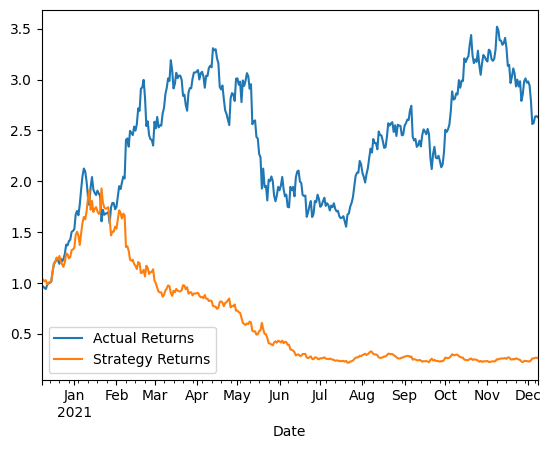

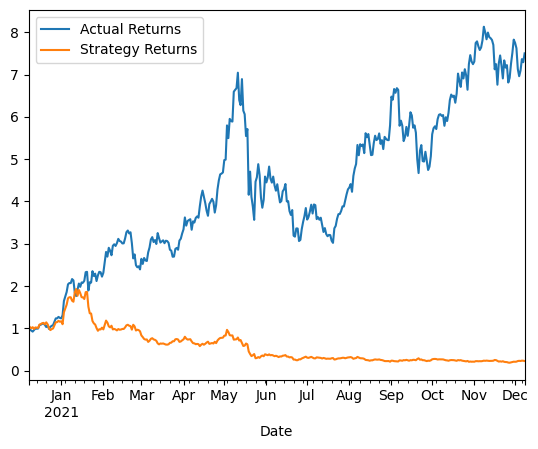

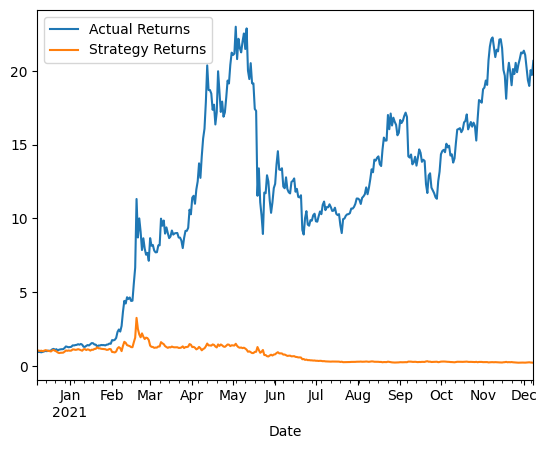

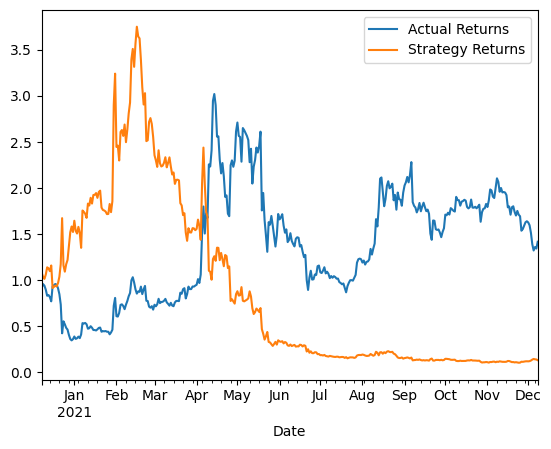

In [28]:
# Plot the actual returns versus the strategy returns
(1 + predictions_df_btc[["Actual Returns", "Strategy Returns"]]).cumprod().plot()
(1 + predictions_df_eth[["Actual Returns", "Strategy Returns"]]).cumprod().plot()
(1 + predictions_df_bnb[["Actual Returns", "Strategy Returns"]]).cumprod().plot()
(1 + predictions_df_xrp[["Actual Returns", "Strategy Returns"]]).cumprod().plot()


In [29]:
# Calculate the points in time when the Signal value changes
# Identify trade entry (1) and exit (-1) points
predictions_df_btc['Entry/Exit'] = predictions_df_btc['signal'].diff()

# Review the DataFrame
predictions_df_btc["Close"] = df_btc["BTC"].copy()
predictions_df_btc

,signal,Actual Returns,Strategy Returns,Entry/Exit,Close
Date,,,,,
2020-12-08,1.0,-0.045358,0.045358,NaN,1.560304
2020-12-09,1.0,0.012705,-0.012705,0.0,1.580128
2020-12-10,1.0,-0.015572,-0.015572,0.0,1.555522
2020-12-11,1.0,-0.011283,0.011283,0.0,1.537970
2020-12-12,1.0,0.041240,-0.041240,0.0,1.601396
...,...,...,...,...,...
2021-12-04,-1.0,-0.082046,0.082046,0.0,4.190134
2021-12-05,-1.0,0.003418,-0.003418,0.0,4.204453
2021-12-06,-1.0,0.024586,0.024586,0.0,4.307824


In [30]:
# Visualize exit position relative to close price
exit = predictions_df_btc[predictions_df_btc['Entry/Exit'] == -2.0]['Close'].hvplot.scatter(
    color='red',
    marker='v',
    size=200,
    legend=False,
    ylabel='Price in $',
    width=1000,
    height=400
)

# Visualize entry position relative to close price
entry = predictions_df_btc[predictions_df_btc['Entry/Exit'] == 2.0]['Close'].hvplot.scatter(
    color='green',
    marker='^',
    size=200,
    legend=False,
    ylabel='Price in $',
    width=1000,
    height=400
)

# Visualize close price for the investment
security_close = predictions_df_btc[['Close']].hvplot(
    line_color='lightgray',
    ylabel='Price in $',
    width=1000,
    height=400
)

# Visualize moving averages
moving_avgs = predictions_df_btc[['Actual Returns', 'Strategy Returns']].hvplot(
    ylabel='Price in $',
    width=1000,
    height=400
)

# Create the overlay plot
entry_exit_plot = security_close * moving_avgs * entry * exit

# Show the plot with a title
entry_exit_plot.opts(
    title="BTC - Actual Returns, Strategy Returns, Entry and Exit Points"
)

/Users/bpalmy/anaconda3/envs/project2/lib/python3.11/site-packages/holoviews/core/data/pandas.py:39: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return dataset.data.dtypes[idx].type
/Users/bpalmy/anaconda3/envs/project2/lib/python3.11/site-packages/holoviews/core/data/pandas.py:39: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return dataset.data.dtypes[idx].type


:Overlay
   .Curve.I          :Curve   [Date]   (Close)
   .NdOverlay.I      :NdOverlay   [Variable]
      :Curve   [Date]   (value)
   .Scatter.Close.I  :Scatter   [Date]   (Close)
   .Scatter.Close.II :Scatter   [Date]   (Close)

## New display model_selection.ValidationCurveDisplay

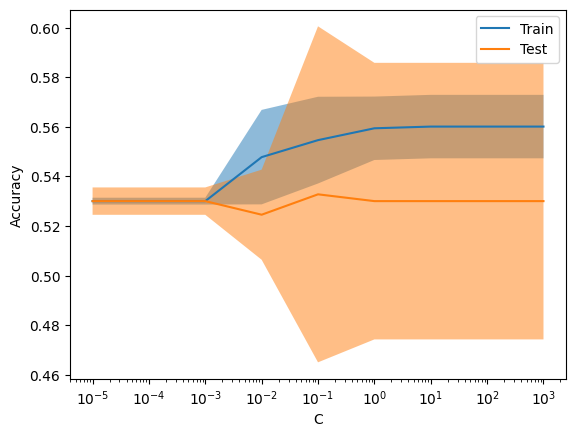

In [31]:

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import ValidationCurveDisplay



_ = ValidationCurveDisplay.from_estimator(
    LogisticRegression(),
    X_train_btc,
    y_train_btc,
    param_name="C",
    param_range=np.geomspace(1e-5, 1e3, num=9),
    score_type="both",
    score_name="Accuracy",
)

### Well calibrated classifiers are probabilistic classifiers for which the output of predict_proba can be directly interpreted as a confidence level. For instance, a well calibrated (binary) classifier should classify the samples such that for the samples to which it gave a predict_proba value close to 0.8, approximately 80% actually belong to the positive class.

### In this example we will compare the calibration of four different models: Logistic regression, Gaussian Naive Bayes, Random Forest Classifier and Linear SVM.

In [32]:
#from sklearn.datasets import make_classification
#from sklearn.model_selection import train_test_split

#X_btc, y_btc = make_classification(
#    n_samples=100_000, n_features=20, n_informative=2, n_redundant=2, random_state=42
#)

#train_samples = 1000  # Samples used for training the models
#X_train_btc, X_test_btc, y_train_btc, y_test_btc = train_test_split(
#    X_btc,
#    y_btc,
#    shuffle=False,
#    test_size=100_000 - train_samples,
#)

In [33]:
import numpy as np

from sklearn.svm import LinearSVC


class NaivelyCalibratedLinearSVC(LinearSVC):
    """LinearSVC with `predict_proba` method that naively scales
    `decision_function` output."""

    def fit(self, X_train_btc, y_train_btc):
        super().fit(X_train_btc, y_train_btc)
        df_btc = self.decision_function(X_train_btc)
        self.df_min_ = df_btc.min()
        self.df_max_ = df_btc.max()

    def predict_proba(self, X_train_btc):
        """Min-max scale output of `decision_function` to [0,1]."""
        df_btc = self.decision_function(X_train_btc)
        calibrated_df = (df_btc - self.df_min_) / (self.df_max_ - self.df_min_)
        proba_pos_class = np.clip(calibrated_df, 0, 1)
        proba_neg_class = 1 - proba_pos_class
        proba = np.c_[proba_neg_class, proba_pos_class]
        return proba

In [34]:
from sklearn.calibration import CalibrationDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

# Create classifiers
lr = LogisticRegression()
gnb = GaussianNB()
svc = NaivelyCalibratedLinearSVC(C=1.0, dual="auto")
rfc = RandomForestClassifier()

clf_list = [
    (lr, "Logistic"),
    (gnb, "Naive Bayes"),
    (svc, "SVC"),
    (rfc, "Random forest"),
]

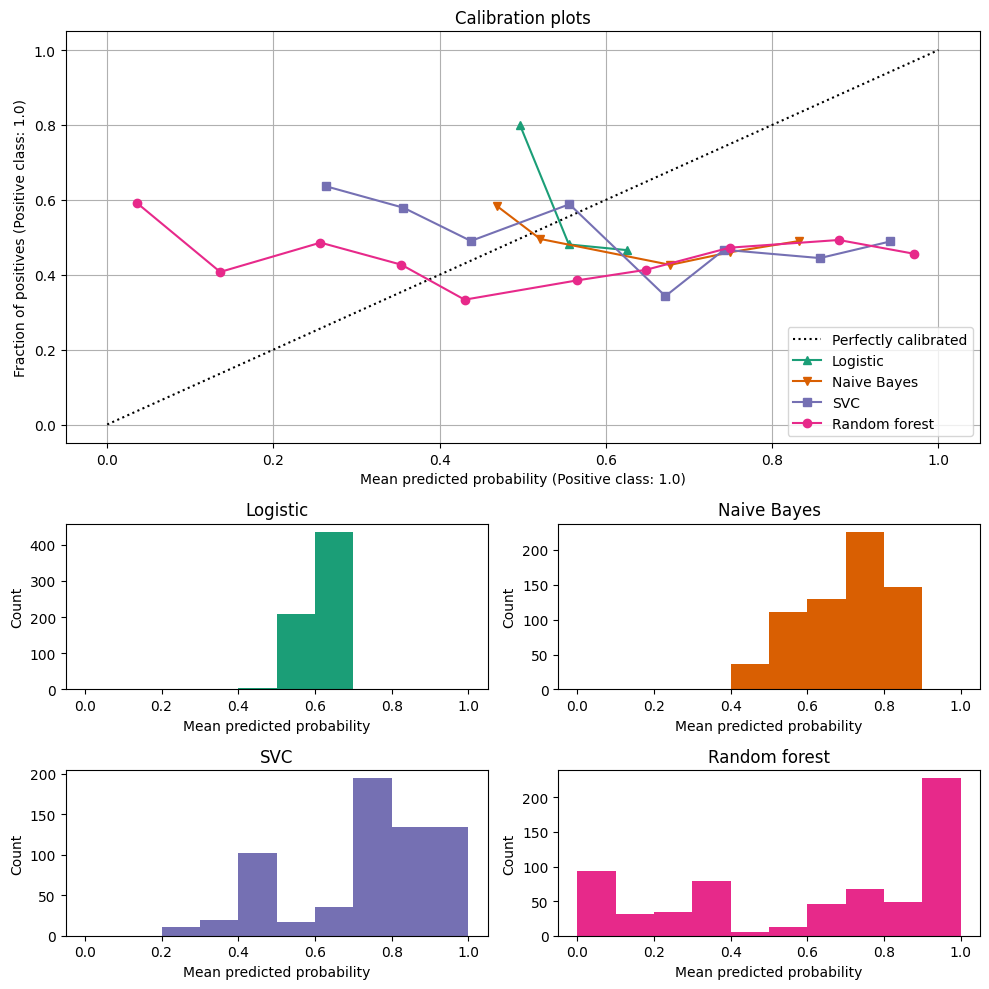

In [35]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

fig = plt.figure(figsize=(10, 10))
gs = GridSpec(4, 2)
colors = plt.get_cmap("Dark2")

ax_calibration_curve = fig.add_subplot(gs[:2, :2])
calibration_displays = {}
markers = ["^", "v", "s", "o"]
for i, (clf, name) in enumerate(clf_list):
    clf.fit(X_train_btc, y_train_btc)
    display = CalibrationDisplay.from_estimator(
        clf,
        X_test_btc,
        y_test_btc,
        n_bins=10,
        name=name,
        ax=ax_calibration_curve,
        color=colors(i),
        marker=markers[i],
    )
    calibration_displays[name] = display

ax_calibration_curve.grid()
ax_calibration_curve.set_title("Calibration plots")

# Add histogram
grid_positions = [(2, 0), (2, 1), (3, 0), (3, 1)]
for i, (_, name) in enumerate(clf_list):
    row, col = grid_positions[i]
    ax = fig.add_subplot(gs[row, col])

    ax.hist(
        calibration_displays[name].y_prob,
        range=(0, 1),
        bins=10,
        label=name,
        color=colors(i),
    )
    ax.set(title=name, xlabel="Mean predicted probability", ylabel="Count")

plt.tight_layout()
plt.show()

In [36]:
# Create an instance of the NaivelyCalibratedLinearSVC class
calibrated_svc = NaivelyCalibratedLinearSVC()

# Train the model on your data
calibrated_svc.fit(X_train_btc, y_train_btc)

# Make probability predictions on new data
predicted_probabilities = calibrated_svc.predict_proba(X_test_btc)

/Users/bpalmy/anaconda3/envs/project2/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/bpalmy/anaconda3/envs/project2/lib/python3.11/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [37]:
from sklearn.calibration import CalibrationDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

# Create classifiers
lr = LogisticRegression()
gnb = GaussianNB()
svc = NaivelyCalibratedLinearSVC(C=1.0, dual="auto")
rfc = RandomForestClassifier()

clf_list = [
    (lr, "Logistic"),
    (gnb, "Naive Bayes"),
    (svc, "SVC"),
    (rfc, "Random forest"),
]

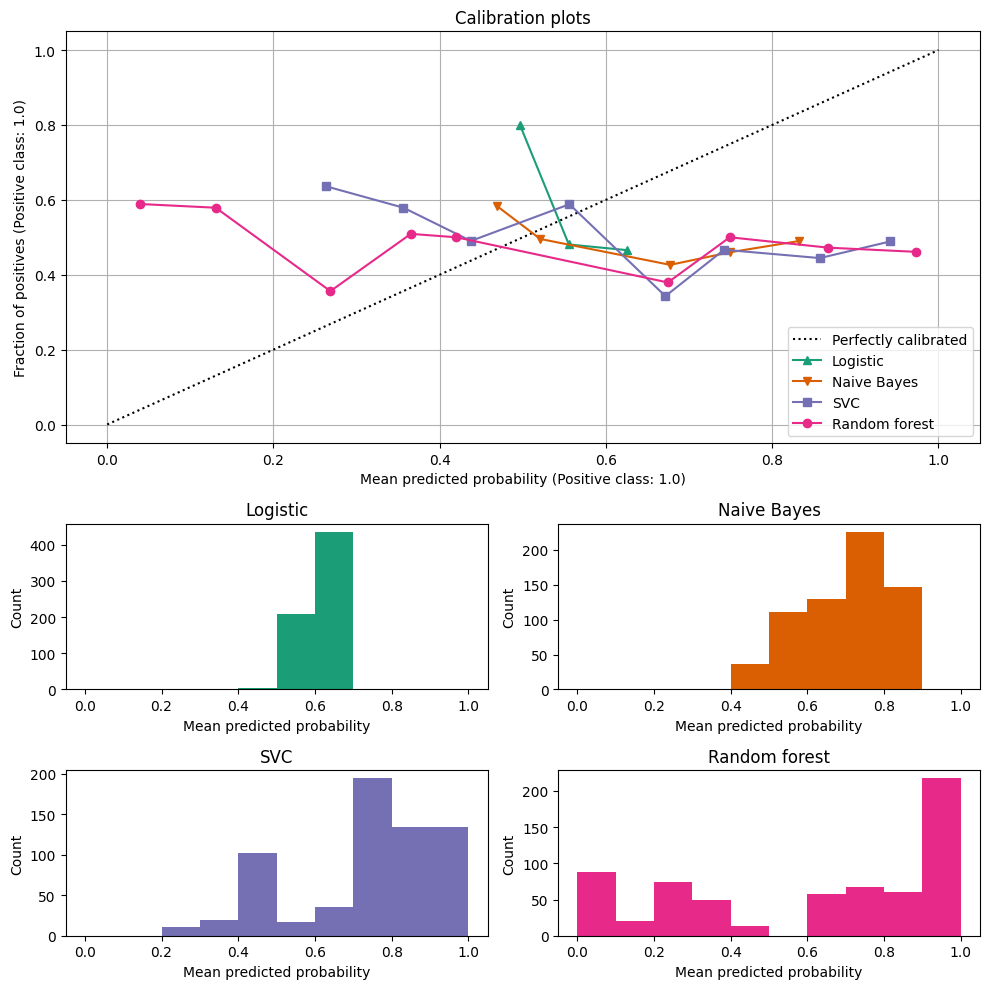

In [38]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

fig = plt.figure(figsize=(10, 10))
gs = GridSpec(4, 2)
colors = plt.get_cmap("Dark2")

ax_calibration_curve = fig.add_subplot(gs[:2, :2])
calibration_displays = {}
markers = ["^", "v", "s", "o"]
for i, (clf, name) in enumerate(clf_list):
    clf.fit(X_train_btc, y_train_btc)
    display = CalibrationDisplay.from_estimator(
        clf,
        X_test_btc,
        y_test_btc,
        n_bins=10,
        name=name,
        ax=ax_calibration_curve,
        color=colors(i),
        marker=markers[i],
    )
    calibration_displays[name] = display

ax_calibration_curve.grid()
ax_calibration_curve.set_title("Calibration plots")

# Add histogram
grid_positions = [(2, 0), (2, 1), (3, 0), (3, 1)]
for i, (_, name) in enumerate(clf_list):
    row, col = grid_positions[i]
    ax = fig.add_subplot(gs[row, col])

    ax.hist(
        calibration_displays[name].y_prob,
        range=(0, 1),
        bins=10,
        label=name,
        color=colors(i),
    )
    ax.set(title=name, xlabel="Mean predicted probability", ylabel="Count")

plt.tight_layout()
plt.show()